# Task 1

---

## Web scraping and analysis

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 39
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Cargo service: that's how I fel...
1,✅ Trip Verified | Inefficient and slow airport...
2,Not Verified | The customer service is one of...
3,"Not Verified | Before my flight, I was forced ..."
4,✅ Trip Verified | British Airways at its bes...


In [ ]:
df

,reviews
0,Not Verified | Cargo service: that's how I fel...
1,✅ Trip Verified | Inefficient and slow airport...
2,Not Verified | The customer service is one of...
3,"Not Verified | Before my flight, I was forced ..."
4,✅ Trip Verified | British Airways at its bes...
...,...
3839,YYZ to LHR - July 2012 - I flew overnight in p...
3840,LHR to HAM. Purser addresses all club passenge...
3841,My son who had worked for British Airways urge...
3842,London City-New York JFK via Shannon on A318 b...


Removing the parts before | in the reviews column

In [ ]:
for i in range(0,3844):
    if '|' in str(df.iloc[[i]].reviews):
        df.loc[i:i, 'reviews'] = df.iloc[[i]].reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,Cargo service: that's how I felt in the A380 ...
1,Inefficient and slow airport operation. Resti...
2,The customer service is one of the worst I h...
3,"Before my flight, I was forced by the ground ..."
4,British Airways at its best. Outstanding se...
...,...
3839,YYZ to LHR - July 2012 - I flew overnight in p...
3840,LHR to HAM. Purser addresses all club passenge...
3841,My son who had worked for British Airways urge...
3842,London City-New York JFK via Shannon on A318 b...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...


In [ ]:
df.isnull().sum()

,0
reviews,0
Cleaned Reviews,0


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

```
NLTK is a leading platform for building Python programs to work with human language data.

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...,"[(Cargo, n), (service, n), (felt, v), (upper, ..."
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...,"[(Inefficient, n), (slow, a), (airport, n), (o..."
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...,"[(customer, n), (service, n), (one, None), (wo..."
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff..."
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...,"[(Cargo, n), (service, n), (felt, v), (upper, ...",Cargo service felt upper deck supposedly nic...
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...,"[(Inefficient, n), (slow, a), (airport, n), (o...",Inefficient slow airport operation Resting l...
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...,"[(customer, n), (service, n), (one, None), (wo...",customer service one bad ever see scheme giv...
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Cargo service: that's how I felt in the A380 ...,Cargo service felt upper deck supposedly nic...
1,Inefficient and slow airport operation. Resti...,Inefficient slow airport operation Resting l...
2,The customer service is one of the worst I h...,customer service one bad ever see scheme giv...
3,"Before my flight, I was forced by the ground ...",flight force ground staff check new expensiv...
4,British Airways at its best. Outstanding se...,British Airways best Outstanding service fli...
...,...,...
3839,YYZ to LHR - July 2012 - I flew overnight in p...,YYZ LHR July fly overnight premium economy c...
3840,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name b...
3841,My son who had worked for British Airways urge...,son work British Airways urge fly British Ai...
3842,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon really ...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Cargo service: that's how I felt in the A380 ...,Cargo service that s how I felt in the A uppe...,"[(Cargo, n), (service, n), (felt, v), (upper, ...",Cargo service felt upper deck supposedly nic...,0.9485,Positive
1,Inefficient and slow airport operation. Resti...,Inefficient and slow airport operation Restin...,"[(Inefficient, n), (slow, a), (airport, n), (o...",Inefficient slow airport operation Resting l...,-0.5423,Negative
2,The customer service is one of the worst I h...,The customer service is one of the worst I ha...,"[(customer, n), (service, n), (one, None), (wo...",customer service one bad ever see scheme giv...,-0.6769,Negative
3,"Before my flight, I was forced by the ground ...",Before my flight I was forced by the ground s...,"[(flight, n), (forced, v), (ground, n), (staff...",flight force ground staff check new expensiv...,-0.6309,Negative
4,British Airways at its best. Outstanding se...,British Airways at its best Outstanding servi...,"[(British, a), (Airways, n), (best, a), (Outst...",British Airways best Outstanding service fli...,0.9773,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,2215
Negative,1224
Neutral,405


# Visual Representation

([<matplotlib.patches.Wedge at 0x7956cef0f190>,
 [Text(-0.2608964563724392, 1.06861267026566, 'Positive'),
  Text(-0.10054748605064777, -1.0953949986415379, 'Negative'),
  Text(1.2767211891941717, -0.43872885141351264, 'Neutral')],
 [Text(-0.14230715802133045, 0.5828796383267235, '57.6%'),
  Text(-0.05484408330035332, -0.5974881810772025, '31.8%'),
  Text(0.8038614894926266, -0.27623668422332276, '10.5%')])

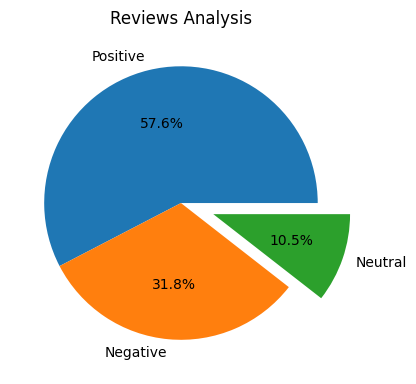

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

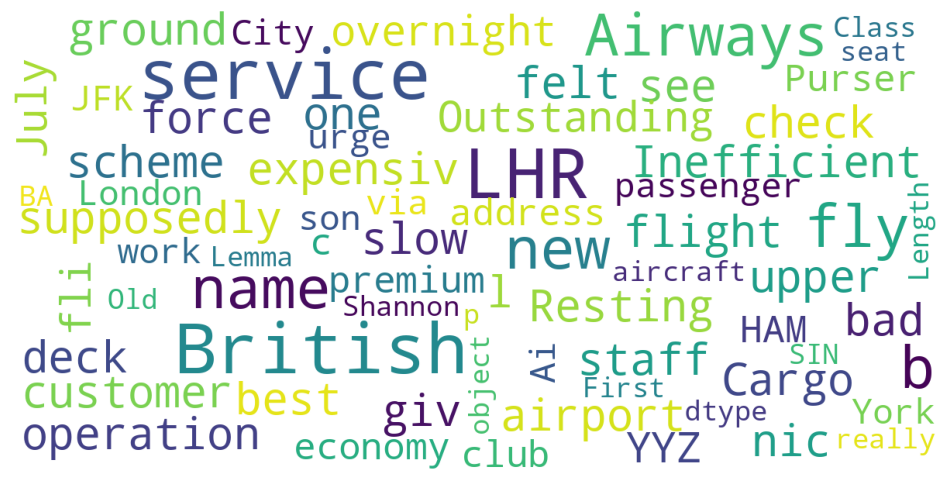

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)